# Proyecto 1
## Red Neuronal (RNN) LSTM

En este proyecto se implementa el modelo LSTM, un tipo de Red Neuronal (RNN) para  diseñada para resolver el desvanecimiento del gradiente que afecta a las RNN tradicionales. Se empleo el dataset us_births_2016_2021.csv, obtenido de Kaggle desde https://www.kaggle.com/datasets/danbraswell/temporary-us-births"



In [2]:
#Importamos las librerías
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#Leemos el dataset
data = pd.read_csv('us_births_2016_2021.csv')
data.isnull().sum() #Comprobar que no existen valores nulos

,0
State,0
State Abbreviation,0
Year,0
Gender,0
Education Level of Mother,0
Education Level Code,0
Number of Births,0
Average Age of Mother (years),0
Average Birth Weight (g),0


In [3]:
#Convertir a valores numéricos las siguientes columnas:
data['State'] = pd.factorize(data['State'])[0]
data['Gender'] = pd.factorize(data['Gender'])[0]
data['Education Level of Mother'] = pd.factorize(data['Education Level of Mother'])[0]
data['State Abbreviation'] = pd.factorize(data['State Abbreviation'])[0]

<Axes: >

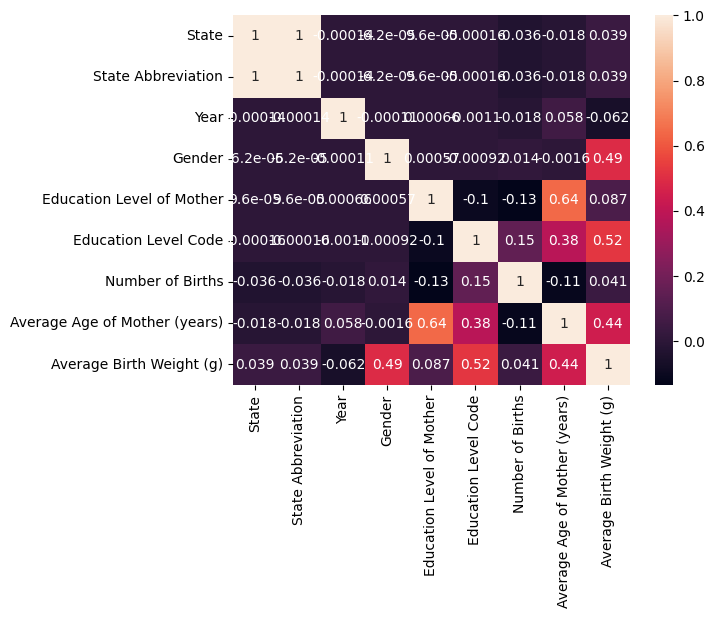

In [4]:
#Matriz de correlación para ver las variables que predicen mejor el número de nacimientos
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

In [5]:
#Seleccionamos las columnas que resultan relevantes
data = data[['Year', 'Average Age of Mother (years)', 'Education Level of Mother', 'Number of Births']]

In [6]:
#Datos de entrenamiento
#Consieramos el número de nacimientos de 2016 como entrenamiento para predecir el número de nacimientos en 2021, posteriormente lo vamos a comparar con el número real de nacimientos en 2021
train_data = data[data['Year'] == 2016] #Datos de entrenamiento
real_data = data[data['Year'] == 2021] #Datos reales para comparación

#Escalado de datos
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Average Age of Mother (years)', 'Education Level of Mother', 'Number of Births']])
real_scaled = scaler.transform(real_data[['Average Age of Mother (years)', 'Education Level of Mother', 'Number of Births']])

In [7]:
#Creación de secuencias de temporales, datos para el entrenamiento
def create_dataset(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, :])
        Y.append(dataset[i + look_back, 2])  # índice 2 = Births
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train_scaled, 10)
X_test, y_test = create_dataset(real_scaled, 10)

In [8]:
#Modelo LSTM
model = Sequential([
    LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 100)        │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,101 (476.96 KB)

 Trainable params: 122,101 (476.96 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0620
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0079
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0069
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0054
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0076
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0050
Epoch 9/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0032
Epoch 10/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026
Epoch 11/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0032
Epoch 12/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029
Epoch 13/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018
Epoch 14/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020
Epoch 15/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024
Epoc

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


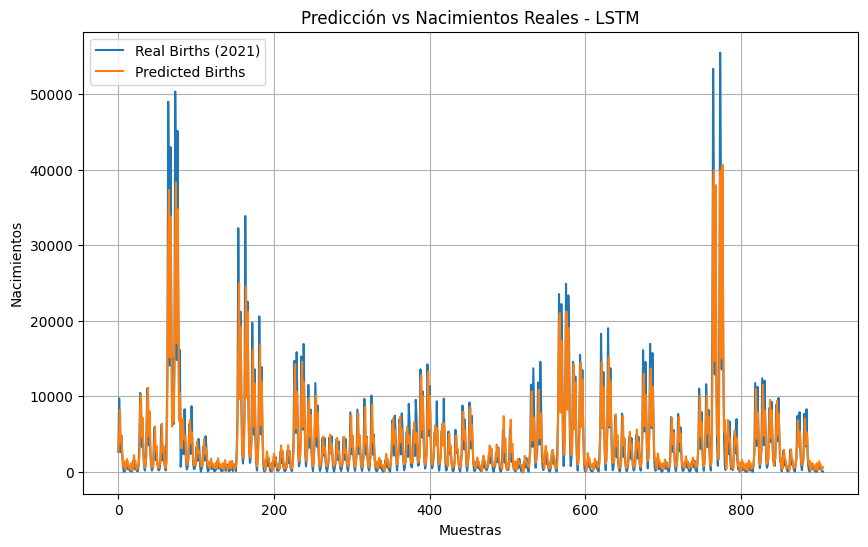

In [11]:
#Predicciones
y_pred = model.predict(X_test)

#Asegurar que y_pred e y_test sean 1D
y_pred_flat = y_pred[:, 0]
y_test_flat = y_test

#Inversión de escala
dummy_input = np.zeros((len(y_pred_flat), 3))
dummy_input[:, 2] = y_pred_flat
inverted_pred = scaler.inverse_transform(dummy_input)[:, 2]

dummy_input[:, 2] = y_test_flat
inverted_real = scaler.inverse_transform(dummy_input)[:, 2]

#Graficar
plt.figure(figsize=(10,6))
plt.plot(inverted_real, label='Real Births (2021)')
plt.plot(inverted_pred, label='Predicted Births')
plt.title('Predicción vs Nacimientos Reales - LSTM')
plt.xlabel('Muestras')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#Ahora vamos a calcular el R-squared para comprobar que tanto se aleja la predicción de la realidad
from sklearn.metrics import r2_score

r2 = r2_score(inverted_real, inverted_pred)
print(f"R-squared: {r2}")
#Note que el valor de R-squared es de 0.89 por lo tanto es aceptable

R-squared: 0.8720613058387885
